In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [13]:
ctx = straxbra.XebraContext()

In [14]:
run = '00059'
peaks_data = ctx.get_array(run, 'peaks')

In [15]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']


In [16]:
def CutCondition_83mKr_firstS1(waveform, i):
    
    firstS1_area = sum(waveform[i][:15]) # range in samples (not ns!)
    firstS1_peaktime = np.argmax(waveform[i][:15]) * 10 # peak time in ns

    
    if firstS1_area > 100 and firstS1_area < 600: 
#       print (i , firstS1_area, firstS1_peaktime)
        return(True, firstS1_peaktime)
    else:
        return(False, 0)

In [17]:
def CutCondition_83mKr_secondS1(waveform, i):
    
    secondS1_area = sum(waveform[i][15:]) # range in samples (not ns!)
    secondS1_peaktime = np.argmax(waveform[i][15:]) * 10 # peak time in ns
    
    if secondS1_area > 40 and secondS1_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True, secondS1_peaktime)
    else:
        return(False, 0)

In [18]:
def Process(waveform, i):

    CutFlag_firstS1, firstS1_peaktime = CutCondition_83mKr_firstS1(waveform, i)
    CutFlag_secondS1, secondS1_peaktime = CutCondition_83mKr_secondS1(waveform, i)
    if CutFlag_firstS1 == True and CutFlag_secondS1 == True:
        Kr_S1_area.append(integral[i])
        Kr_S1_width.append(width[i])
        Delta_t.append(secondS1_peaktime - firstS1_peaktime)
        
        
        
        if integral[i+1] > 500 and width[i+1] >200 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            PMT1_area_fraction.append(area_per_channel[i+1][1])
            PMT2_area_fraction.append(area_per_channel[i+1][2])
            PMT3_area_fraction.append(area_per_channel[i+1][3])
            PMT4_area_fraction.append(area_per_channel[i+1][4])
            PMT5_area_fraction.append(area_per_channel[i+1][5])
            PMT6_area_fraction.append(area_per_channel[i+1][6])
            PMT7_area_fraction.append(area_per_channel[i+1][7]) 
            
            sum_area = sum(area_per_channel[i+1][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+1][1:8])):
                sample_list.append(float(area_per_channel[i+1][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+1][1]:
                PMT1_light.append((area_per_channel[i+1][1])/sum_area)
            if sum_area > area_per_channel[i+1][2]:
                PMT2_light.append((area_per_channel[i+1][2])/sum_area)
            if sum_area > area_per_channel[i+1][3]:
                PMT3_light.append((area_per_channel[i+1][3])/sum_area)
            if sum_area > area_per_channel[i+1][4]:
                PMT4_light.append((area_per_channel[i+1][4])/sum_area)
            if sum_area > area_per_channel[i+1][5]:
                PMT5_light.append((area_per_channel[i+1][5])/sum_area)
            if sum_area > area_per_channel[i+1][6]:
                PMT6_light.append((area_per_channel[i+1][6])/sum_area) 
            if sum_area > area_per_channel[i+1][7]:
                PMT7_light.append((area_per_channel[i+1][7])/sum_area)
            
            

        elif integral[i+2] > 500 and width[i+2] >200 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000:
            PMT1_area_fraction.append(area_per_channel[i+2][1])
            PMT2_area_fraction.append(area_per_channel[i+2][2])
            PMT3_area_fraction.append(area_per_channel[i+2][3])
            PMT4_area_fraction.append(area_per_channel[i+2][4])
            PMT5_area_fraction.append(area_per_channel[i+2][5])
            PMT6_area_fraction.append(area_per_channel[i+2][6])
            PMT7_area_fraction.append(area_per_channel[i+2][7])  
            
            sum_area = sum(area_per_channel[i+2][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+2][1:8])):
                sample_list.append(float(area_per_channel[i+2][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+2][1]:
                PMT1_light.append((area_per_channel[i+2][1])/sum_area)
            if sum_area > area_per_channel[i+2][2]:
                PMT2_light.append((area_per_channel[i+2][2])/sum_area)
            if sum_area > area_per_channel[i+2][3]:
                PMT3_light.append((area_per_channel[i+2][3])/sum_area)
            if sum_area > area_per_channel[i+2][4]:
                PMT4_light.append((area_per_channel[i+2][4])/sum_area)
            if sum_area > area_per_channel[i+2][5]:
                PMT5_light.append((area_per_channel[i+2][5])/sum_area)
            if sum_area > area_per_channel[i+2][6]:
                PMT6_light.append((area_per_channel[i+2][6])/sum_area) 
            if sum_area > area_per_channel[i+2][7]:
                PMT7_light.append((area_per_channel[i+2][7])/sum_area)
            
            
            
        elif integral[i+3] > 500 and width[i+3] >200 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            PMT1_area_fraction.append(area_per_channel[i+3][1])
            PMT2_area_fraction.append(area_per_channel[i+3][2])
            PMT3_area_fraction.append(area_per_channel[i+3][3])
            PMT4_area_fraction.append(area_per_channel[i+3][4])
            PMT5_area_fraction.append(area_per_channel[i+3][5])
            PMT6_area_fraction.append(area_per_channel[i+3][6])
            PMT7_area_fraction.append(area_per_channel[i+3][7])
            
            sum_area = sum(area_per_channel[i+3][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+3][1:8])):
                sample_list.append(float(area_per_channel[i+3][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+3][1]:
                PMT1_light.append((area_per_channel[i+3][1])/sum_area)
            if sum_area > area_per_channel[i+3][2]:
                PMT2_light.append((area_per_channel[i+3][2])/sum_area)
            if sum_area > area_per_channel[i+3][3]:
                PMT3_light.append((area_per_channel[i+3][3])/sum_area)
            if sum_area > area_per_channel[i+3][4]:
                PMT4_light.append((area_per_channel[i+3][4])/sum_area)
            if sum_area > area_per_channel[i+3][5]:
                PMT5_light.append((area_per_channel[i+3][5])/sum_area)
            if sum_area > area_per_channel[i+3][6]:
                PMT6_light.append((area_per_channel[i+3][6])/sum_area) 
            if sum_area > area_per_channel[i+3][7]:
                PMT7_light.append((area_per_channel[i+3][7])/sum_area)            

            
        elif integral[i+4] > 500 and width[i+4] >200 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            PMT1_area_fraction.append(area_per_channel[i+4][1])
            PMT2_area_fraction.append(area_per_channel[i+4][2])
            PMT3_area_fraction.append(area_per_channel[i+4][3])
            PMT4_area_fraction.append(area_per_channel[i+4][4])
            PMT5_area_fraction.append(area_per_channel[i+4][5])
            PMT6_area_fraction.append(area_per_channel[i+4][6])
            PMT7_area_fraction.append(area_per_channel[i+4][7])
            
            sum_area = sum(area_per_channel[i+4][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+4][1:8])):
                sample_list.append(float(area_per_channel[i+4][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+4][1]:
                PMT1_light.append((area_per_channel[i+4][1])/sum_area)
            if sum_area > area_per_channel[i+4][2]:
                PMT2_light.append((area_per_channel[i+4][2])/sum_area)
            if sum_area > area_per_channel[i+4][3]:
                PMT3_light.append((area_per_channel[i+4][3])/sum_area)
            if sum_area > area_per_channel[i+4][4]:
                PMT4_light.append((area_per_channel[i+4][4])/sum_area)
            if sum_area > area_per_channel[i+4][5]:
                PMT5_light.append((area_per_channel[i+4][5])/sum_area)
            if sum_area > area_per_channel[i+4][6]:
                PMT6_light.append((area_per_channel[i+4][6])/sum_area) 
            if sum_area > area_per_channel[i+4][7]:
                PMT7_light.append((area_per_channel[i+4][7])/sum_area)               
            
        elif integral[i+5] > 500 and width[i+5] >200 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            PMT1_area_fraction.append(area_per_channel[i+5][1])
            PMT2_area_fraction.append(area_per_channel[i+5][2])
            PMT3_area_fraction.append(area_per_channel[i+5][3])
            PMT4_area_fraction.append(area_per_channel[i+5][4])
            PMT5_area_fraction.append(area_per_channel[i+5][5])
            PMT6_area_fraction.append(area_per_channel[i+5][6])
            PMT7_area_fraction.append(area_per_channel[i+5][7])
            
            sum_area = sum(area_per_channel[i+5][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+5][1:8])):
                sample_list.append(float(area_per_channel[i+5][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+5][1]:
                PMT1_light.append((area_per_channel[i+5][1])/sum_area)
            if sum_area > area_per_channel[i+5][2]:
                PMT2_light.append((area_per_channel[i+5][2])/sum_area)
            if sum_area > area_per_channel[i+5][3]:
                PMT3_light.append((area_per_channel[i+5][3])/sum_area)
            if sum_area > area_per_channel[i+5][4]:
                PMT4_light.append((area_per_channel[i+5][4])/sum_area)
            if sum_area > area_per_channel[i+5][5]:
                PMT5_light.append((area_per_channel[i+5][5])/sum_area)
            if sum_area > area_per_channel[i+5][6]:
                PMT6_light.append((area_per_channel[i+5][6])/sum_area) 
            if sum_area > area_per_channel[i+5][7]:
                PMT7_light.append((area_per_channel[i+5][7])/sum_area)   
             
         
        elif integral[i+6] > 500 and width[i+6] >200 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            PMT1_area_fraction.append(area_per_channel[i+6][1])
            PMT2_area_fraction.append(area_per_channel[i+6][2])
            PMT3_area_fraction.append(area_per_channel[i+6][3])
            PMT4_area_fraction.append(area_per_channel[i+6][4])
            PMT5_area_fraction.append(area_per_channel[i+6][5])
            PMT6_area_fraction.append(area_per_channel[i+6][6])
            PMT7_area_fraction.append(area_per_channel[i+6][7])
            sum_area = sum(area_per_channel[i+6][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+6][1:8])):
                sample_list.append(float(area_per_channel[i+6][1:8][k]))
            sum_area = sum(sample_list)
                
            if sum_area > area_per_channel[i+6][1]:
                PMT1_light.append((area_per_channel[i+6][1])/sum_area)
            if sum_area > area_per_channel[i+6][2]:
                PMT2_light.append((area_per_channel[i+6][2])/sum_area)
            if sum_area > area_per_channel[i+6][3]:
                PMT3_light.append((area_per_channel[i+6][3])/sum_area)
            if sum_area > area_per_channel[i+6][4]:
                PMT4_light.append((area_per_channel[i+6][4])/sum_area)
            if sum_area > area_per_channel[i+6][5]:
                PMT5_light.append((area_per_channel[i+6][5])/sum_area)
            if sum_area > area_per_channel[i+6][6]:
                PMT6_light.append((area_per_channel[i+6][6])/sum_area) 
            if sum_area > area_per_channel[i+6][7]:
                PMT7_light.append((area_per_channel[i+6][7])/sum_area)              
            


In [19]:
#PMT0_light = []
num = len(waveform)
Delta_t = []
Kr_S1_area = []
Kr_S1_width = []
Kr_S2_area = []
Kr_S2_width = []
Kr_S2area_per_channel = []


####% area fraction of PMT with cut#####
PMT0_light = []
PMT1_light = []
PMT2_light = []
PMT3_light = []
PMT4_light = []
PMT5_light = []
PMT6_light = []
PMT7_light = []


####area_per_channel for each PMT####

PMT1_area_fraction =[]
PMT2_area_fraction =[]
PMT3_area_fraction =[]
PMT4_area_fraction =[]
PMT5_area_fraction =[]
PMT6_area_fraction =[]
PMT7_area_fraction =[]

for i in range(0,num):
    
    Process(waveform,i)

# Area_per_channel for opposite side PMTs

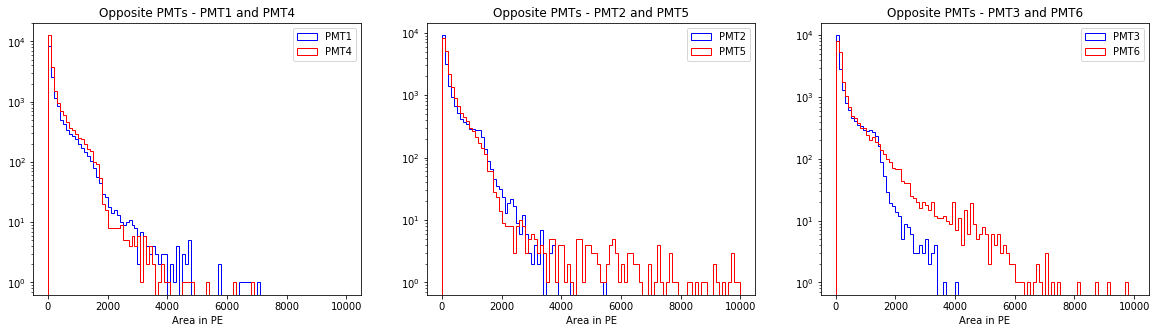

23224
23224


In [20]:
###################Area per channel of opposite side PMTs#######################




num_bins = 100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20, 5))
ax1.hist(PMT1_area_fraction, num_bins, range = [1,10000], density= False, histtype='step', color='blue', label='PMT1')
ax1.hist(PMT4_area_fraction, num_bins, range = [1,10000], density= False, histtype='step', color='red', label='PMT4')
ax1.set_xlabel('Area in PE')
ax1.set_yscale('log')
ax1.set_title('Opposite PMTs - PMT1 and PMT4')
ax1.legend()
#ax1.legend(prop={'size': 10})

ax2.hist(PMT2_area_fraction, num_bins, range = [1,10000],density= False, histtype='step', color='blue', label='PMT2')
ax2.hist(PMT5_area_fraction, num_bins, range = [1,10000],density= False, histtype='step', color='red', label='PMT5')
ax2.set_title('Opposite PMTs - PMT2 and PMT5')
ax2.set_xlabel('Area in PE')
ax2.set_yscale('log')
ax2.legend()

ax3.hist(PMT3_area_fraction, num_bins, range = [1,10000],density= False, histtype='step', color='blue', label='PMT3')
ax3.hist(PMT6_area_fraction, num_bins, range = [1,10000],density= False, histtype='step', color='red', label='PMT6')
ax3.set_title('Opposite PMTs - PMT3 and PMT6')
ax3.set_xlabel('Area in PE')
ax3.set_yscale('log')
ax3.legend()

plt.show()
print(len(PMT1_area_fraction))
print(len(PMT4_area_fraction))

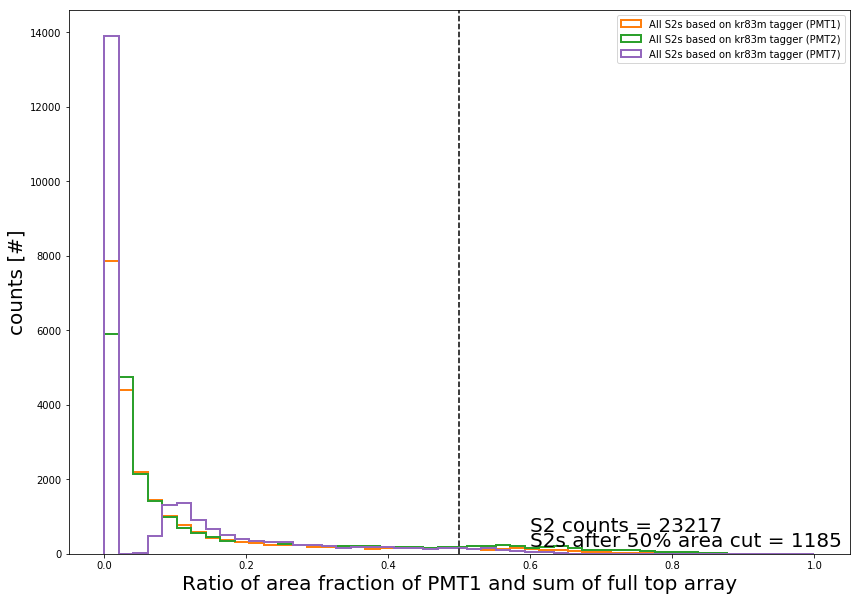

In [21]:
fig, ax = plt.subplots(figsize=(14,10))
bins_x = np.linspace(0,1,50)
new_list=[]
for i in range(0,len(PMT1_light)):
    if PMT1_light[i] > 0.5:
        new_list.append(PMT1_light)

plt.hist(PMT1_light, bins=bins_x, histtype='step', color='C1', linewidth = 2, label = 'All S2s based on kr83m tagger (PMT1)')
plt.hist(PMT2_light, bins=bins_x, histtype='step', color='C2', linewidth = 2, label = 'All S2s based on kr83m tagger (PMT2)')
plt.hist(PMT7_light, bins=bins_x, histtype='step', color='C4', linewidth = 2, label = 'All S2s based on kr83m tagger (PMT7)')
ax.set_xlabel('Ratio of area fraction of PMT1 and sum of full top array', fontsize = 20)
ax.set_ylabel('counts [#]', fontsize = 20)
ax.text(0.6, 600, 'S2 counts = '+str(len(PMT1_light)), fontsize=20, color = 'black')
ax.text(0.6, 200, 'S2s after 50% area cut = '+str(len(new_list)), fontsize=20, color = 'black')
ax.axvline(x=0.5, ymin=0, ymax=750, linestyle = '--', color = 'black')
plt.legend()
plt.show()

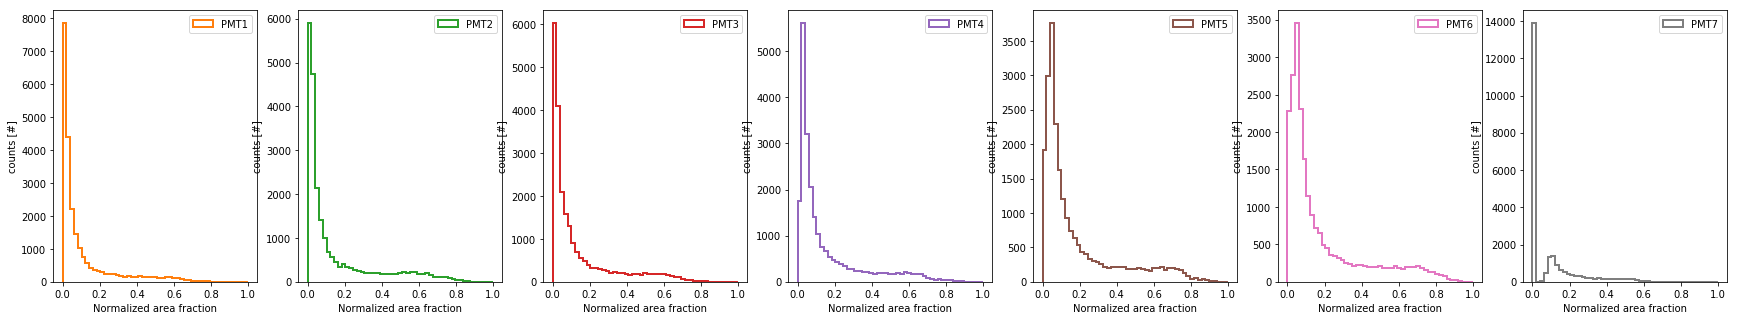

In [22]:

bins_x = np.linspace(0,1,50)

fig, (ax1, ax2, ax3,ax4, ax5,ax6,ax7) = plt.subplots(1, 7, sharex=False, figsize=(30, 5))
ax1.hist(PMT1_light, bins=bins_x, histtype='step', color='C1', linewidth = 2, label = 'PMT1')
ax1.set_xlabel('Normalized area fraction', fontsize = 10)
ax1.set_ylabel('counts [#]', fontsize = 10)
ax1.legend()

ax2.hist(PMT2_light, bins=bins_x, histtype='step', color='C2', linewidth = 2, label = 'PMT2')
ax2.set_xlabel('Normalized area fraction', fontsize = 10)
ax2.set_ylabel('counts [#]', fontsize = 10)
ax2.legend()

ax3.hist(PMT3_light, bins=bins_x, histtype='step', color='C3', linewidth = 2, label = 'PMT3')
ax3.set_xlabel('Normalized area fraction', fontsize = 10)
ax3.set_ylabel('counts [#]', fontsize = 10)
ax3.legend()

ax4.hist(PMT4_light, bins=bins_x, histtype='step', color='C4', linewidth = 2, label = 'PMT4')
ax4.set_xlabel('Normalized area fraction', fontsize = 10)
ax4.set_ylabel('counts [#]', fontsize = 10)
ax4.legend()

ax5.hist(PMT5_light, bins=bins_x, histtype='step', color='C5', linewidth = 2, label = 'PMT5')
ax5.set_xlabel('Normalized area fraction', fontsize = 10)
ax5.set_ylabel('counts [#]', fontsize = 10)
ax5.legend()

ax6.hist(PMT6_light, bins=bins_x, histtype='step', color='C6', linewidth = 2, label = 'PMT6')
ax6.set_xlabel('Normalized area fraction', fontsize = 10)
ax6.set_ylabel('counts [#]', fontsize = 10)
ax6.legend()

ax7.hist(PMT7_light, bins=bins_x, histtype='step', color='C7', linewidth = 2, label = 'PMT7')
ax7.set_xlabel('Normalized area fraction', fontsize = 10)
ax7.set_ylabel('counts [#]', fontsize = 10)
ax7.legend()



plt.show()